# Classification of players into points

In [ ]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from time import time 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
import itertools
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


1. Read Data from file with clustered points

In [ ]:
df_new = pd.read_csv('bowler_clusters.csv')
df_new

,match_id,bowler,inning,batting_team,total_bowler_runs,maiden,economy,overs,wickets,venue,catch,Direct_runout,Indirect_runout,Stumping,lbw/bowled,fp_points,fp_avg,opp_avg,ven_avg,inn_avg,run_avg,eco_avg,maiden_avg,wicket_avg,over_avg,Points
0,1,P Kumar,1,Kolkata Knight Riders,38.0,0.0,9.500000,4,0,M Chinnaswamy Stadium,1.0,0.0,0.0,0.0,0.0,8.0,0.000000,8.000000,8.000000,8.000000,38.000000,9.500000,0.000000,0.000000,4.000000,0
1,1,I Sharma,2,Royal Challengers Bangalore,7.0,0.0,2.333333,3,1,M Chinnaswamy Stadium,0.0,0.0,0.0,0.0,1.0,39.0,0.000000,39.000000,39.000000,39.000000,7.000000,2.333333,0.000000,1.000000,3.000000,2
2,1,AB Agarkar,2,Royal Challengers Bangalore,25.0,0.0,6.250000,4,3,M Chinnaswamy Stadium,0.0,0.0,1.0,0.0,0.0,87.0,0.000000,87.000000,87.000000,87.000000,25.000000,6.250000,0.000000,3.000000,4.000000,3
3,1,AB Dinda,2,Royal Challengers Bangalore,9.0,0.0,3.000000,3,2,M Chinnaswamy Stadium,0.0,0.0,0.0,0.0,1.0,64.0,0.000000,64.000000,64.000000,64.000000,9.000000,3.000000,0.000000,2.000000,3.000000,2
4,1,Z Khan,1,Kolkata Knight Riders,38.0,0.0,9.500000,4,1,M Chinnaswamy Stadium,0.0,0.0,0.0,0.0,0.0,25.0,0.000000,25.000000,25.000000,25.000000,38.000000,9.500000,0.000000,1.000000,4.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,786,A Nortje,2,Rajasthan Royals,33.0,0.0,8.250000,4,2,Dubai International Cricket Stadium,0.0,0.0,0.0,0.0,2.0,66.0,30.333333,46.500000,47.500000,44.857143,29.375000,7.343750,0.000000,1.250000,4.000000,0
5325,786,JD Unadkat,1,Delhi Capitals,32.0,0.0,10.666667,3,2,Dubai International Cricket Stadium,0.0,0.0,0.0,0.0,0.0,48.0,30.333333,24.000000,33.200000,37.250000,30.435897,8.876068,0.038462,1.128205,3.500000,1
5326,786,JC Archer,1,Delhi Capitals,19.0,0.0,4.750000,4,3,Dubai International Cricket Stadium,2.0,0.0,0.0,0.0,1.0,109.0,47.000000,63.333333,66.666667,55.789474,28.482759,7.160920,0.103448,1.344828,3.965517,2
5327,786,R Tewatia,1,Delhi Capitals,23.0,0.0,7.666667,3,0,Dubai International Cricket Stadium,1.0,0.0,0.0,0.0,0.0,8.0,30.000000,40.000000,13.666667,27.307692,20.576923,7.791667,0.038462,0.846154,2.807692,0


2. Converting categorical data to numerical data

In [ ]:
df=df_new

# Opposite team code 
df["batting_team"]= df["batting_team"].astype("category")
df["batting_team_code"] = df["batting_team"].cat.codes

# Venue code
df["venue"]= df["venue"].astype("category")
df["venue_code"] = df["venue"].cat.codes

# Bowler name code
df["bowler"]= df["bowler"].astype("category")
df["bowler_code"] = df["bowler"].cat.codes

# Dictionary mapping of bowler name to their code
bowler_zip = dict(zip(df['bowler_code'],df['bowler']))
print(bowler_zip)
df_ready = df.drop(columns=["venue","batting_team","bowler"])
df_ready

{141: 'P Kumar', 71: 'I Sharma', 10: 'AB Agarkar', 11: 'AB Dinda', 221: 'Z Khan', 179: 'S Sreesanth', 215: 'WA Mota', 112: 'M Muralitharan', 139: 'P Amarnath', 125: 'MS Gony', 33: 'B Lee', 123: 'MM Patel', 186: 'SK Warne', 185: 'SK Trivedi', 50: 'D Salunkhe', 30: 'B Geeves', 62: 'GD McGrath', 109: 'M Kartik', 148: 'PP Ojha', 161: 'RP Singh', 217: 'WPUJC Vaas', 58: 'DS Kulkarni', 155: 'R Vinay Kumar', 4: 'A Nehra', 67: 'Harbhajan Singh', 29: 'B Akhil', 150: 'Pankaj Singh', 127: 'Mohammad Asif', 214: 'VS Yeligati', 116: 'MA Khote', 49: 'D Kalyankrishna', 212: 'VRV Singh', 197: 'Sohail Tanvir', 1: 'A Kumble', 55: 'DNT Zoysa', 59: 'DW Steyn', 47: 'CRD Fernando', 209: 'Umar Gul', 64: 'Gagandeep Singh', 147: 'PJ Sangwan', 113: 'M Ntini', 57: 'DP Vijaykumar', 104: 'L Balaji', 2: 'A Mishra', 196: 'Shoaib Akhtar', 22: 'Abdur Razzak', 163: 'RR Powar', 5: 'A Nel', 36: 'BAW Mendis', 200: 'T Henderson', 101: 'Kamran Khan', 203: 'T Thushara', 187: 'SL Malinga', 219: 'YA Abdulla', 56: 'DP Nannes', 16

,match_id,inning,total_bowler_runs,maiden,economy,overs,wickets,catch,Direct_runout,Indirect_runout,Stumping,lbw/bowled,fp_points,fp_avg,opp_avg,ven_avg,inn_avg,run_avg,eco_avg,maiden_avg,wicket_avg,over_avg,Points,batting_team_code,venue_code,bowler_code
0,1,1,38.0,0.0,9.500000,4,0,1.0,0.0,0.0,0.0,0.0,8.0,0.000000,8.000000,8.000000,8.000000,38.000000,9.500000,0.000000,0.000000,4.000000,0,7,14,141
1,1,2,7.0,0.0,2.333333,3,1,0.0,0.0,0.0,0.0,1.0,39.0,0.000000,39.000000,39.000000,39.000000,7.000000,2.333333,0.000000,1.000000,3.000000,2,13,14,71
2,1,2,25.0,0.0,6.250000,4,3,0.0,0.0,1.0,0.0,0.0,87.0,0.000000,87.000000,87.000000,87.000000,25.000000,6.250000,0.000000,3.000000,4.000000,3,13,14,10
3,1,2,9.0,0.0,3.000000,3,2,0.0,0.0,0.0,0.0,1.0,64.0,0.000000,64.000000,64.000000,64.000000,9.000000,3.000000,0.000000,2.000000,3.000000,2,13,14,11
4,1,1,38.0,0.0,9.500000,4,1,0.0,0.0,0.0,0.0,0.0,25.0,0.000000,25.000000,25.000000,25.000000,38.000000,9.500000,0.000000,1.000000,4.000000,0,7,14,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,786,2,33.0,0.0,8.250000,4,2,0.0,0.0,0.0,0.0,2.0,66.0,30.333333,46.500000,47.500000,44.857143,29.375000,7.343750,0.000000,1.250000,4.000000,0,10,6,6
5325,786,1,32.0,0.0,10.666667,3,2,0.0,0.0,0.0,0.0,0.0,48.0,30.333333,24.000000,33.200000,37.250000,30.435897,8.876068,0.038462,1.128205,3.500000,1,2,6,80
5326,786,1,19.0,0.0,4.750000,4,3,2.0,0.0,0.0,0.0,1.0,109.0,47.000000,63.333333,66.666667,55.789474,28.482759,7.160920,0.103448,1.344828,3.965517,2,2,6,79
5327,786,1,23.0,0.0,7.666667,3,0,1.0,0.0,0.0,0.0,0.0,8.0,30.000000,40.000000,13.666667,27.307692,20.576923,7.791667,0.038462,0.846154,2.807692,0,2,6,154


3. Selecting most relevant features for bowler

In [ ]:
bowl_df = df_ready[['wicket_avg','maiden_avg','eco_avg','inn_avg','ven_avg','opp_avg','fp_avg','over_avg','bowler_code','batting_team_code','venue_code','inning']]
bowl_df


,wicket_avg,maiden_avg,eco_avg,inn_avg,ven_avg,opp_avg,fp_avg,over_avg,bowler_code,batting_team_code,venue_code,inning
0,0.000000,0.000000,9.500000,8.000000,8.000000,8.000000,0.000000,4.000000,141,7,14,1
1,1.000000,0.000000,2.333333,39.000000,39.000000,39.000000,0.000000,3.000000,71,13,14,2
2,3.000000,0.000000,6.250000,87.000000,87.000000,87.000000,0.000000,4.000000,10,13,14,2
3,2.000000,0.000000,3.000000,64.000000,64.000000,64.000000,0.000000,3.000000,11,13,14,2
4,1.000000,0.000000,9.500000,25.000000,25.000000,25.000000,0.000000,4.000000,221,7,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5324,1.250000,0.000000,7.343750,44.857143,47.500000,46.500000,30.333333,4.000000,6,10,6,2
5325,1.128205,0.038462,8.876068,37.250000,33.200000,24.000000,30.333333,3.500000,80,2,6,1
5326,1.344828,0.103448,7.160920,55.789474,66.666667,63.333333,47.000000,3.965517,79,2,6,1
5327,0.846154,0.038462,7.791667,27.307692,13.666667,40.000000,30.000000,2.807692,154,2,6,1


4. Labels separation

In [ ]:
y = df_ready['Points'].values
y

array([0, 2, 3, ..., 2, 0, 3])

5. Normalization of features

In [ ]:
# Fitting data for normalization using sklearn library
X = preprocessing.StandardScaler().fit(bowl_df).transform(bowl_df.astype(float))
X

array([[-2.70680789, -0.5747821 ,  1.42986532, ...,  0.0200465 ,
        -0.43502576, -1.00658955],
       [-0.32152423, -0.5747821 , -4.77604047, ...,  1.38963335,
        -0.43502576,  0.99345359],
       [ 4.4490431 , -0.5747821 , -1.38444079, ...,  1.38963335,
        -0.43502576,  0.99345359],
       ...,
       [ 0.50098738,  0.79903013, -0.59563882, ..., -1.12127588,
        -1.23332199, -1.00658955],
       [-0.68849094, -0.06400576, -0.04944943, ..., -1.12127588,
        -1.23332199, -1.00658955],
       [ 2.24724279, -0.5747821 , -0.01059314, ...,  0.70483992,
        -1.23332199,  0.99345359]])

6. Split data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

# 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4263, 12) (4263,)
Test set: (1066, 12) (1066,)


7. Building a random forest classifier model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [ ]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

8. Predicting points of test set

In [ ]:
yhat = rf.predict(X_test)

9. Accuracy calculation of prediction

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, rf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9849870982875909
Test set Accuracy:  0.41369606003752346


10. Classification report 

In [ ]:
t0 = time()
y_pred = rf.predict(X_test)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))

done in 0.008s
              precision    recall  f1-score   support

           0       0.38      0.54      0.45       298
           1       0.45      0.29      0.36       197
           2       0.44      0.37      0.40       205
           3       0.42      0.44      0.43       322
           4       0.43      0.14      0.21        44

    accuracy                           0.41      1066
   macro avg       0.42      0.35      0.37      1066
weighted avg       0.42      0.41      0.41      1066



11. Plot of confusion matrix

Function to plot confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Plot of matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    # setting Ticks 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # iterating over matrix and adding to plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    # Adding x and y labels
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Saving bowl_dict.txt to bowl_dict.txt


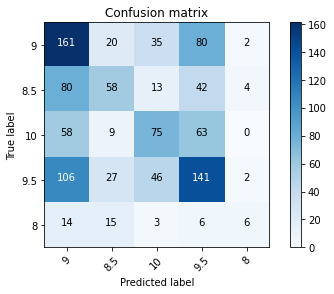

In [ ]:
import json
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
plt.figure()

from google.colab import files
bowl_dict = files.upload()

fp = open("bowl_dict.txt",'r')
bowl_dict = fp.read()

js = json.loads(bowl_dict)
bowl_dict = js
plot_confusion_matrix(cnf_matrix, classes=[bowl_dict["0"],bowl_dict["1"],bowl_dict["2"],bowl_dict["3"],bowl_dict["4"]],normalize= False,  title='Confusion matrix')

# Feature Selection step

Feature: 0, Score: 0.08333
Feature: 1, Score: 0.05666
Feature: 2, Score: 0.12437
Feature: 3, Score: 0.09964
Feature: 4, Score: 0.13578
Feature: 5, Score: 0.11444
Feature: 6, Score: 0.08462
Feature: 7, Score: 0.08892
Feature: 8, Score: 0.06815
Feature: 9, Score: 0.05972
Feature: 10, Score: 0.06762
Feature: 11, Score: 0.01676


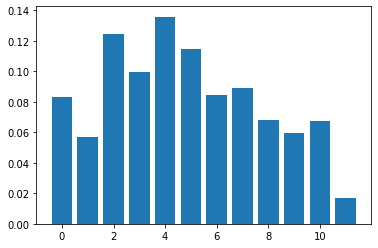

In [ ]:
# Random forest importance feature
importance = rf.feature_importances_
fn_df = pd.DataFrame({'Features':pd.DataFrame(X).columns})

# List of features
lst=['wicket_avg','maiden_avg','eco_avg','innings_avg','venue_avg','opp_avg','fp_avg','overs_avg','bowler_code','batting_team_code','venue_code','inning']

# Printing importances of each feature
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# Plotting importances
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

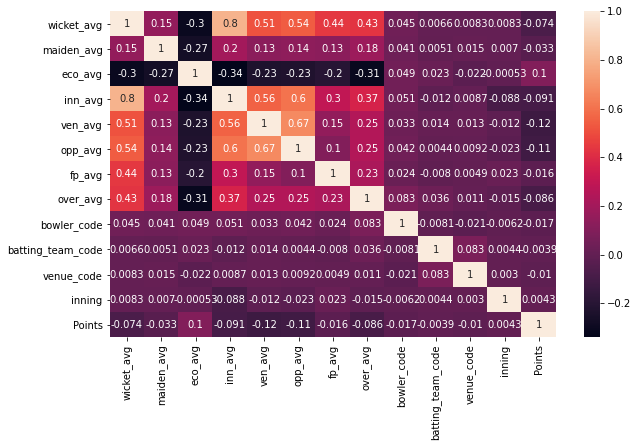

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# List of features
df_cor =df_ready[['wicket_avg','maiden_avg','eco_avg','inn_avg','ven_avg','opp_avg','fp_avg','over_avg','bowler_code','batting_team_code','venue_code','inning','Points']]

# Finding correlation of each feature and label
corr = df_cor.corr()

# Heatmap plot of Correlation
plt.figure(figsize = (10,6))
sns.heatmap(corr,annot=True)

In [ ]:
# Importing python libraries for chi-square importances
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Categorical valued features
bowl_df = df_ready[['bowler_code','batting_team_code','venue_code','inning']].values

# Conversion to int
X_cat = bowl_df.astype(int)

# Chi-square model
chi2_fet = SelectKBest(chi2,k=2)

# Selecating best categorical features
X_best = chi2_fet.fit_transform(X_cat,y)

# Printing both features
print("All features")
print(X_cat)
print("Selected features")
print(X_best)

All features
[[141   7  14   1]
 [ 71  13  14   2]
 [ 10  13  14   2]
 ...
 [ 79   2   6   1]
 [154   2   6   1]
 [ 88  10   6   2]]
Selected features
[[141   7]
 [ 71  13]
 [ 10  13]
 ...
 [ 79   2]
 [154   2]
 [ 88  10]]


# HyperParamater Tuning

In [ ]:
# Import randomized search CV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
import pprint

# RandomizedSearch with given grid parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 34.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Predict test values using newly trained model
yhat = rf.predict(X_test)

In [ ]:
# Classification report
t0 = time()
y_pred = rf.predict(X_test)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))

done in 0.007s
              precision    recall  f1-score   support

           0       0.42      0.51      0.46       312
           1       0.41      0.47      0.44       349
           2       0.46      0.34      0.39       163
           3       0.38      0.09      0.15        32
           4       0.46      0.36      0.40       210

    accuracy                           0.43      1066
   macro avg       0.43      0.35      0.37      1066
weighted avg       0.43      0.43      0.42      1066



Confusion matrix, without normalization
[[160 105  26   0  21]
 [108 163  19   3  56]
 [ 56  41  55   1  10]
 [ 10   7  11   3   1]
 [ 46  80   8   1  75]]


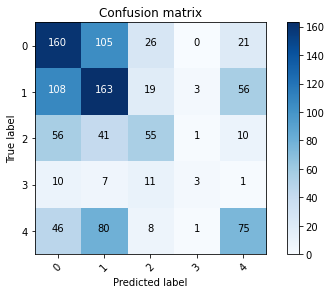

In [ ]:
# Plot of confusion matrix 
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1','2','3','4'],normalize= False,  title='Confusion matrix')